# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [90]:
#import os
import numpy as np
import pandas as pd
import seaborn as sns
#from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 17

PATH_DATASET = "Data/train"
X_train = np.loadtxt("Data/train/X_train.txt")
y_train = np.loadtxt("Data/train/y_train.txt").astype(int)

print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

# Exploramos un poco las features
#df = pd.DataFrame(data=X_train)
#df.describe()

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [106]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
# Aplico PCA con sciKit learn
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

Implementamos PCA

In [31]:
# Cantidad de componentes necesarios
Vector= X_pca.shape[1]
print(Vector)

63


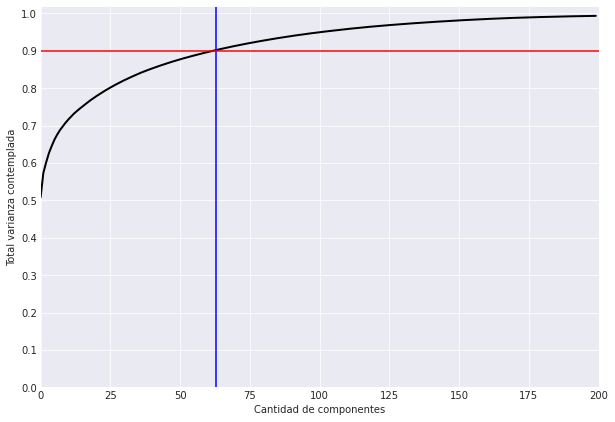

In [35]:
#media = np.mean(X_pca,axis=1)
#varianza = np.var(X_pca,axis=1)

#print(media)
#print(varianza)
#print(media.shape)

pca_2 = PCA(n_components=200, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show();

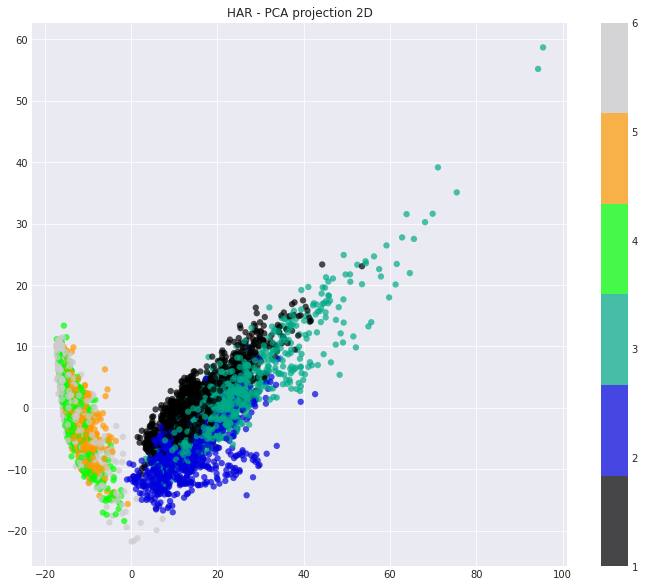

In [103]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

6
(7352, 63)


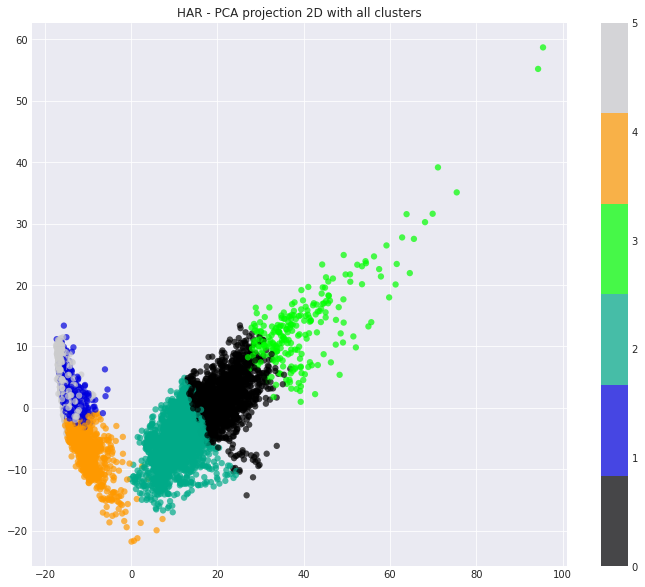

In [107]:
from sklearn.cluster import KMeans
# Cantidad única de clases
clases = np.unique(y_train)
n_clases = clases.size
print(n_clases)
clase_2 = 2
clase_6 = 6
print(X_pca.shape)

#Agrupamos en 6 clusters y grafico con las 2 componentes principales
kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('HAR - PCA projection 2D with all clusters');

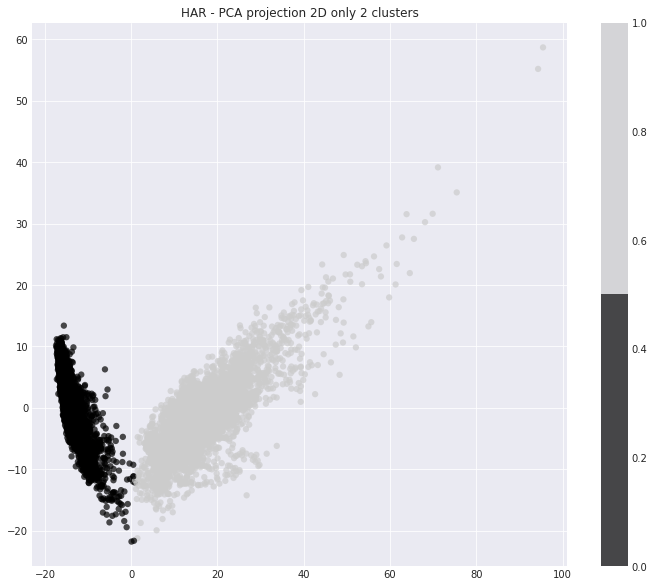

In [56]:
#Agrupamos en 2 clusters y grafico con las 2 componentes principales
kmeans_twoCluster = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_twoCluster.fit(X_pca)
cluster_labels_twoCluster = kmeans_twoCluster.labels_

#plt.colorbar()
#plt.colorbar()
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_twoCluster, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D only 2 clusters');

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

In [ ]:
# not implemented

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [59]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#import seaborn as sns
#import os
#import gzip
#import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize


In [60]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Importamos el dataset

In [66]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

print('Formato de las etiquetas: {}'.format(y_train.shape))

Formato de las etiquetas: (60000,)


Mapeamos las etiquetas

In [70]:
y_mapping = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Exploramos un poco las features
df_etiquetas = pd.DataFrame(data=y_mapping)
df_etiquetas.describe()

,0
count,10
unique,10
top,T-shirt/top
freq,1


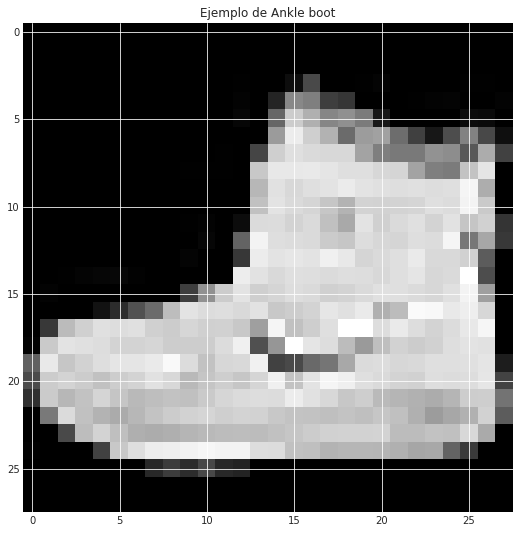

In [79]:
#y_train
# Cargamos una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y_mapping[y_train[0]]))
plt.imshow(x_train[0, :].reshape((28, 28)), cmap='gray')

Creamos una clase PCA

In [81]:
class PCA_FMNIST:
    def __init__(self, X, y, n_components, whiten = False):
        '''
        inputs:
            X                    - dataset de entrada
            y                    - labels
            n_components         - cantidad de componentes principales a usar
            whiten               - indica si se multiplica los elementos por
                                   la raiz cuadrada de X.shape[0] y se divide por los valores singulares --> varianza unitaria
        '''
        self.X = X
        self.n_components = n_components
        self.with_whiten = whiten
        self.y = y
        self.y_mapping = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
                          'Sneaker', 'Bag', 'Ankle boot']

        # Normalizamos el dataset
        #self.scaler = StandardScaler()
        # Ver diferencias entre StandardScaler y Normalize
        #self.X_norm = self.scaler.fit_transform(X)
        self.X_norm = normalize(X)

        # Aplicamos PCA al dataset normalizado
        self.PCAModel = PCA(n_components=self.n_components, whiten=self.with_whiten)
        self.X_norm_r = self.PCAModel.fit_transform(self.X_norm)

    def PCA_transform(self, X):
        return self.PCAModel.transform(X)

    def PCA_reconstruct(self, X_transformed):
        return self.PCAModel.inverse_transform(X_transformed)

    def InterpretUsingModel(self, X):
        return self.PCAModel.inverse_transform(self.PCAModel.transform(X))

    def variance_plot(self, n_components):
        plt.subplot(1, 1, 1)
        plt.plot(range(n_components), self.PCAModel.explained_variance_ratio_[:n_components])
        plt.plot(range(n_components), np.cumsum(self.PCAModel.explained_variance_ratio_[:n_components]))
        plt.title("Varianza explicada por componente y Cumulativa ", fontsize=10)

    def last_n_components(self, n_components):
        X_norm = self.X_norm.T
        S = X_norm @ X_norm.T
        eigvals, eigvecs = np.linalg.eig(S)
        order = np.argsort(eigvals)
        B = eigvecs[:, order[:n_components]]
        C = B.T @ X_norm
        X_rec = B @ C
        X_rec = X_rec.T
        return X_rec

    @staticmethod
    def plot_image(x):
        plt.imshow(x.reshape((28, 28)), cmap='gray')

    def plot_example(self, idx):
        plt.grid(True)
        plt.title("Ejemplo de {}".format(y_mapping[self.y[idx]]))
        self.plot_image(self.X[idx, :])

    @staticmethod
    def MSE(X, vector):
        n = X.shape[1]
        return np.sum((X - vector) ** 2, axis=1) / n

    def plot_reconstructions(self, X, numReconstructions=5):
        numSamples = np.shape(X)[0]
        numReconstructions = min(numReconstructions, numSamples)
        numReconstructionsPerFigure = min(5, numReconstructions)
        numFigures = int(np.ceil(float(numReconstructions)/numReconstructionsPerFigure))

        for figureidx in range(numFigures):
            plt.figure(figsize = (18, 18))
            for plotCol in range(numReconstructionsPerFigure):
                data_idx = np.random.randint(numSamples)
                originalImage = X[data_idx,:].ravel()
                reconstructedImage = self.InterpretUsingModel(np.reshape(X[data_idx,:],[1,-1])).ravel()
                diffImage = abs(originalImage - reconstructedImage)

                # original image
                plt.subplot(3,numReconstructionsPerFigure,0*numReconstructionsPerFigure+plotCol+1)
                self.plot_image(originalImage)
                plt.title('Imagen original')
                plt.axis('off')

                # reconstred image
                plt.subplot(3,numReconstructionsPerFigure,1*numReconstructionsPerFigure+plotCol+1)
                self.plot_image(reconstructedImage)
                plt.title('Imagen reconstruida')
                plt.axis('off')

                # diff image
                plt.subplot(3,numReconstructionsPerFigure,2*numReconstructionsPerFigure+plotCol+1)
                self.plot_image(diffImage)
                plt.title('Diferencia absoluta')
                plt.axis('off')
            plt.tight_layout()

    def quantile_records(self, X, vector, q=0.5):
        """
        Devuelve el cuantil q del ECM entre la salida original y transformada para un determinado componente.
        """
        errors = self.MSE(X, vector)
        q_value = np.quantile(errors, q, method="lower")
        record = errors==q_value
        return X[record, :]

    def plot_quartiles(self, X, trans, n):
        fig, axarr = plt.subplots(n, 7, figsize=(12, n*2))
        for i in range(n):
            vector = trans.components_[i, :]
            sns.heatmap(self.quantile_records(X, vector, q=0.02).reshape(28, 28), cmap='gray_r', ax=axarr[i][0], cbar=False)
            axarr[i][0].set_aspect('equal')
            axarr[i][0].axis('off')

            sns.heatmap(self.quantile_records(X, vector, q=0.1).reshape(28, 28), cmap='gray_r', ax=axarr[i][1], cbar=False)
            axarr[i][1].set_aspect('equal')
            axarr[i][1].axis('off')

            sns.heatmap(self.quantile_records(X, vector, q=0.25).reshape(28, 28), cmap='gray_r', ax=axarr[i][2], cbar=False)
            axarr[i][2].set_aspect('equal')
            axarr[i][2].axis('off')

            sns.heatmap(self.quantile_records(X, vector, q=0.5).reshape(28, 28), cmap='gray_r', ax=axarr[i][3], cbar=False)
            axarr[i][3].set_aspect('equal')
            axarr[i][3].axis('off')

            sns.heatmap(self.quantile_records(X, vector, q=0.75).reshape(28, 28), cmap='gray_r', ax=axarr[i][4], cbar=False)
            axarr[i][4].set_aspect('equal')
            axarr[i][4].axis('off')

            sns.heatmap(self.quantile_records(X, vector, q=0.9).reshape(28, 28), cmap='gray_r', ax=axarr[i][5], cbar=False)
            axarr[i][5].set_aspect('equal')
            axarr[i][5].axis('off')

            sns.heatmap(self.quantile_records(X, vector, q=0.98).reshape(28, 28), cmap='gray_r', ax=axarr[i][6], cbar=False)
            axarr[i][6].set_aspect('equal')
            axarr[i][6].axis('off')

        axarr[0][0].set_title('2nd Percentile', fontsize=12)
        axarr[0][1].set_title('10th Percentile', fontsize=12)
        axarr[0][2].set_title('25th Percentile', fontsize=12)
        axarr[0][3].set_title('50th Percentile', fontsize=12)
        axarr[0][4].set_title('75th Percentile', fontsize=12)
        axarr[0][5].set_title('90th Percentile', fontsize=12)
        axarr[0][6].set_title('98th Percentile', fontsize=12)

    def plot_pca_space(self):
        plt.figure(figsize=(12,10))
        plt.scatter(self.X_norm_r[:, 0], self.X_norm_r[:, 1], c=self.y,
        edgecolor='none', alpha=0.7, s=40,
        cmap=plt.cm.get_cmap('nipy_spectral', 10))
        plt.colorbar()
        plt.title('FMNIST - PCA projection 2D');

    def ShowVarianceDirections(self, numDirectionsToShow=16):
        numFigRows = 4
        numFigCols = 4
        numDirectionsPerFigure = numFigRows*numFigCols
        numFigures = int(np.ceil(float(numDirectionsToShow)/numDirectionsPerFigure))
        for figureInd in range(numFigures):
            plt.figure(figsize=(12,10))
            for plotInd in range(numDirectionsPerFigure):
                eigVecInd = numDirectionsPerFigure*figureInd + plotInd
                deltaImage = self.PCAModel.components_[eigVecInd,:].ravel().reshape((28, 28))
                plt.subplot(numFigRows,numFigCols,plotInd+1)
                plt.imshow(deltaImage,cmap='jet')
                plt.axis('off')
                titleStr = str(100*self.PCAModel.explained_variance_ratio_[eigVecInd])[0:5]
                plt.title(titleStr + '% explained')
            plt.tight_layout()

    def ShowModelVariations(self, numVariations=5):

        numVarsPerFigure = min(5,numVariations)
        numFigures = int(np.ceil(float(numVariations)/numVarsPerFigure))

        lowRepVec     = np.percentile(self.X_norm_r, 2, axis=0)
        medianRepVec  = np.percentile(self.X_norm_r, 50, axis=0)
        highRepVec    = np.percentile(self.X_norm_r, 98, axis=0)

        for figureInd in range(numFigures):
            plt.figure(figsize=(18,18))
            for plotCol in range(numVarsPerFigure):
                eigVecInd = numVarsPerFigure*figureInd+plotCol

                # Representación de los vectores de activación por percentil
                currLowPrecentileRepVec             = medianRepVec.copy()
                currLowPrecentileRepVec[eigVecInd]  = lowRepVec[eigVecInd]
                currHighPrecentileRepVec            = medianRepVec.copy()
                currHighPrecentileRepVec[eigVecInd] = highRepVec[eigVecInd]

                deltaImage = self.PCAModel.components_[eigVecInd,:].ravel().reshape((28, 28))
                lowPrecentileImage = self.PCAModel.inverse_transform(currLowPrecentileRepVec).ravel().reshape((28, 28))
                medianImage = self.PCAModel.inverse_transform(medianRepVec).ravel().reshape((28, 28))
                highPrecentileImage = self.PCAModel.inverse_transform(currHighPrecentileRepVec).ravel().reshape((28, 28))

                # Calculamos con KDE la distribución Gaussiana de los valores en la dirección de un componente
                # Valor arbitrario
                sigmaOfKDE = 0.12
                pdfStart   = min(self.X_norm_r[:,eigVecInd]) - 3*sigmaOfKDE
                pdfStop    = max(self.X_norm_r[:,eigVecInd]) + 3*sigmaOfKDE
                xAxis = np.linspace(pdfStart,pdfStop,200)
                PDF_Model = KernelDensity(kernel='gaussian',
                                  bandwidth=sigmaOfKDE).fit(self.X_norm_r[:,eigVecInd].reshape(-1,1))
                logPDF = PDF_Model.score_samples(xAxis.reshape(-1,1))

                # show distribution of current component
                plt.subplot(5,numVarsPerFigure,0*numVarsPerFigure+plotCol+1)
                plt.fill(xAxis, np.exp(logPDF), fc='b')
                percentExplainedString = str(100*self.PCAModel.explained_variance_ratio_[eigVecInd])[0:5]
                plt.title(percentExplainedString + '% explained')

                # show variance direction (eigenvector)
                plt.subplot(5,numVarsPerFigure,1*numVarsPerFigure+plotCol+1)
                plt.imshow(deltaImage, cmap='jet')
                plt.title('eigenvector ' + str(eigVecInd))
                plt.axis('off')

                # show 2nd precentile image
                plt.subplot(5,numVarsPerFigure,2*numVarsPerFigure+plotCol+1)
                plt.imshow(lowPrecentileImage, cmap='gray')
                plt.title('2nd precentile image')
                plt.axis('off')

                # show median image
                plt.subplot(5,numVarsPerFigure,3*numVarsPerFigure+plotCol+1)
                plt.imshow(medianImage, cmap='gray')
                plt.title('median Image')
                plt.axis('off')

                # show 98th precentile image
                plt.subplot(5,numVarsPerFigure,4*numVarsPerFigure+plotCol+1)
                plt.imshow(highPrecentileImage, cmap='gray')
                plt.title('98th precentile image')
                plt.axis('off')
            plt.tight_layout()

    def ShowSingleComponentVariation(self, listOfComponents=[0,1]):
        percentilesToShow = [1,20,40,60,80,99]
        numReadDataSamplePerPercentile = 1
        representationPercentiles = []

        # Percentiles de los datos transformados
        # TODO: usar la función quartile creada más arriba
        for percentile in percentilesToShow:
            representationPercentiles.append(np.percentile(self.X_norm_r, percentile, axis=0))

        medianRepVec =  np.percentile(self.X_norm_r, 50, axis=0)

        for eigVecInd in listOfComponents:
            plt.figure(figsize=(18,18))
            gs = gridspec.GridSpec(numReadDataSamplePerPercentile+2, len(percentilesToShow))

            # Calculamos con KDE la distribución Gaussiana de los valores en la dirección de un componente
            sigmaOfKDE = 0.12
            pdfStart   = min(self.X_norm_r[:,eigVecInd]) - 3*sigmaOfKDE
            pdfStop    = max(self.X_norm_r[:,eigVecInd]) + 3*sigmaOfKDE
            xAxis = np.linspace(pdfStart,pdfStop,200)
            PDF_Model = KernelDensity(kernel='gaussian',
                              bandwidth=sigmaOfKDE).fit(self.X_norm_r[:,eigVecInd].reshape(-1,1))
            logPDF = PDF_Model.score_samples(xAxis.reshape(-1,1))

            percentileValuesToShow = \
                    [representationPercentiles[x][eigVecInd] for x in range(len(representationPercentiles))]
            percentilesToShowLogPDF = \
                    PDF_Model.score_samples(np.array(percentileValuesToShow).reshape(-1,1))


            # Plotear la distribución y puntos rojos en los percentiles
            plt.subplot(gs[0,:])
            plt.fill(xAxis, np.exp(logPDF), fc='b');
            plt.scatter(percentileValuesToShow, np.exp(percentilesToShowLogPDF), c='r',s=40);
            plt.title(str(100*self.PCAModel.explained_variance_ratio_[eigVecInd]) + '% explained');

            for plotCol, currPrecentile in enumerate(percentilesToShow):
                currPrecentileRepVec             = medianRepVec.copy()
                currPrecentileRepVec[eigVecInd]  = representationPercentiles[plotCol][eigVecInd]
                currPrecentileImage = self.PCAModel.inverse_transform(currPrecentileRepVec).ravel().reshape((28, 28))

                # Mostrar la imagen "mediana"
                plt.subplot(gs[1,plotCol]);
                plt.imshow(currPrecentileImage, cmap='gray');
                plt.title('precentile: ' + str(percentilesToShow[plotCol]) + '%');
                plt.axis('off')

            plt.tight_layout()

Resultados de PCA

In [82]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

In [83]:
# Instanciamos la clase
PCA_FM = PCA_FMNIST(x_train, y_train, 120)

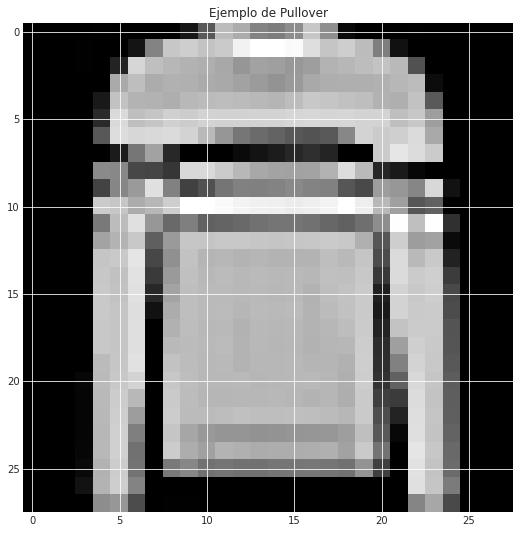

In [84]:
# Ploteamos un ejemplo de los datos
PCA_FM.plot_example(5)

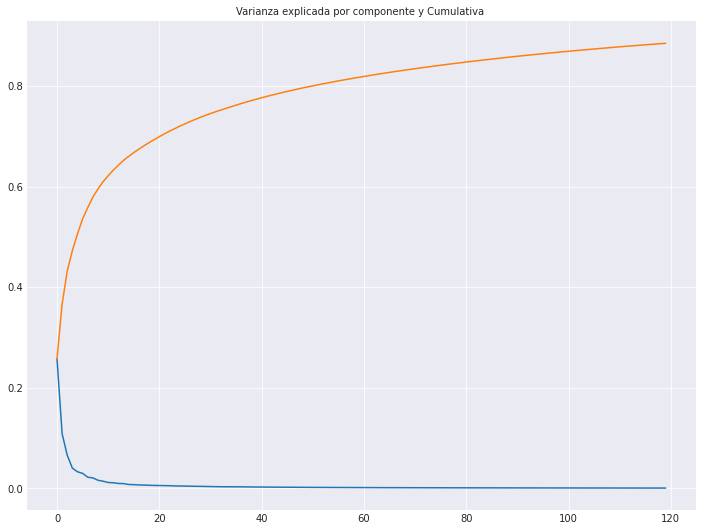

In [85]:
# Ploteamos el ratio de explicabilidad de la varianza en función de la cantidad de componentes principales
PCA_FM.variance_plot(n_components=120)

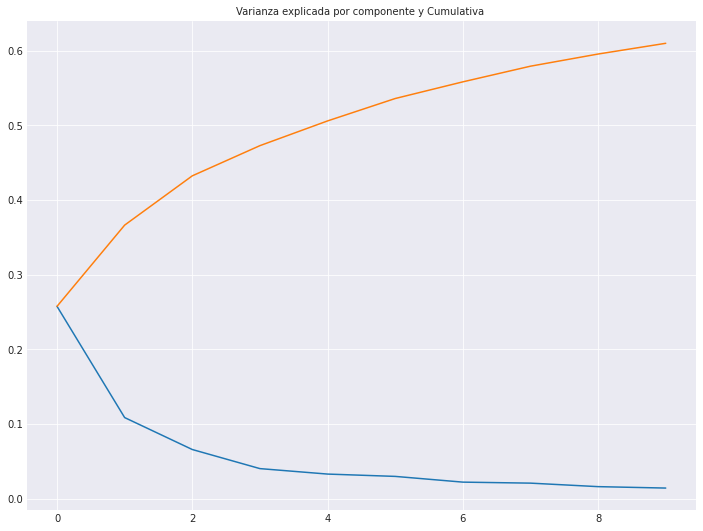

In [86]:
PCA_FM.variance_plot(n_components=10)

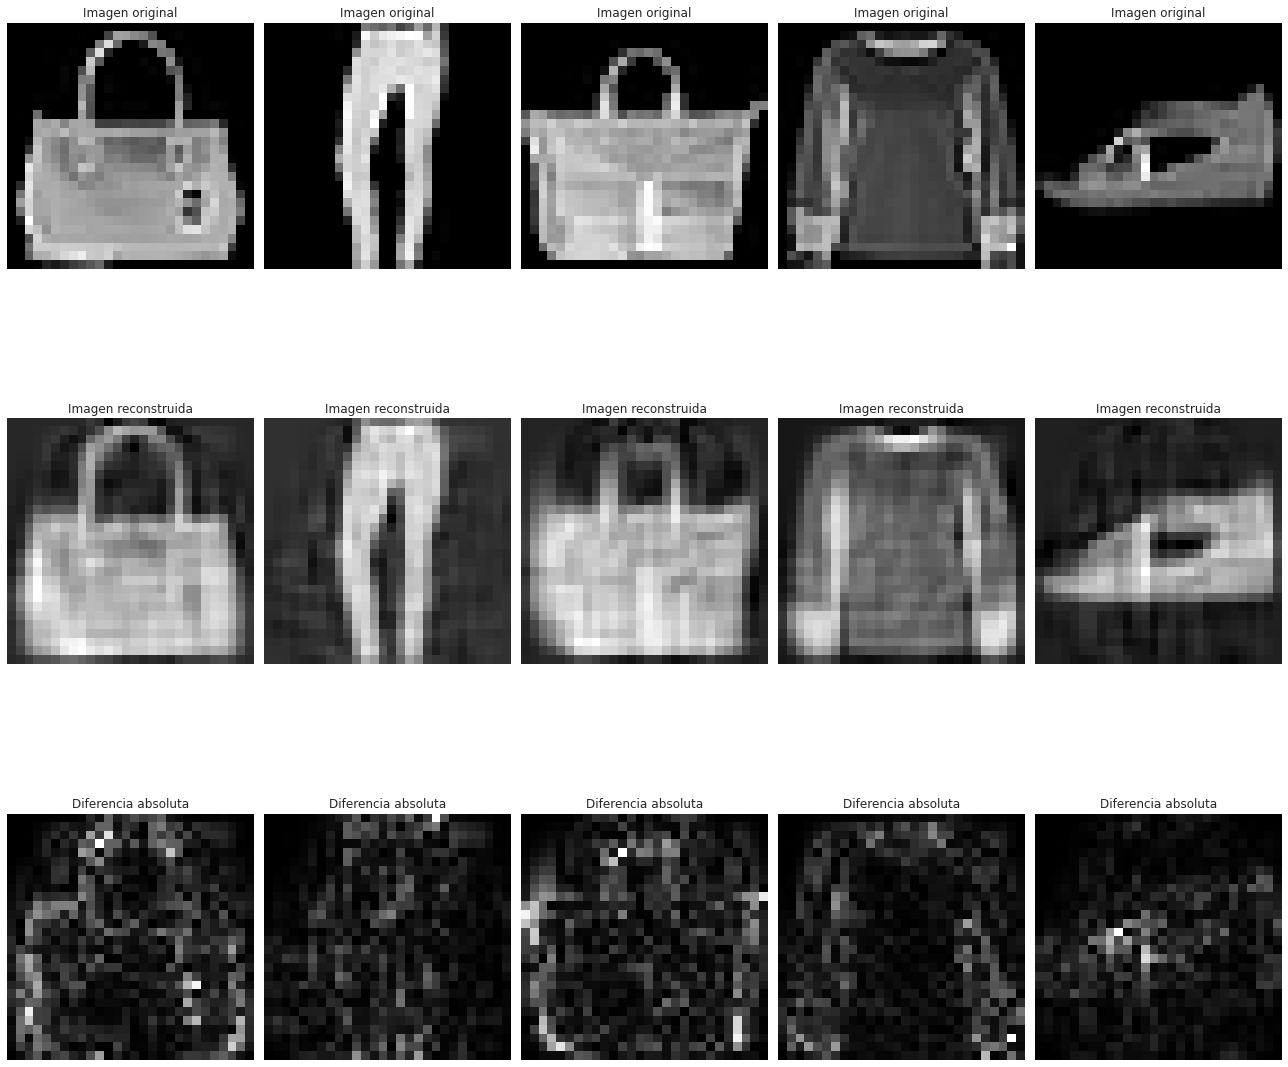

In [87]:
# Mostramos algunas reconstrucciones
PCA_FM.plot_reconstructions(x_train, 5)

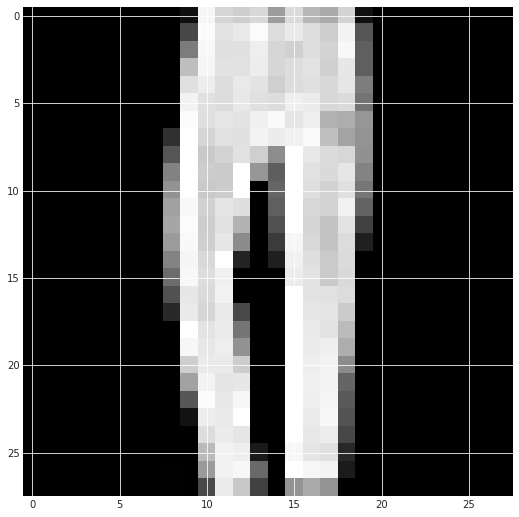

In [88]:
# Plotear un cuartil determinado para un compontente determinado

PCA_FM.plot_image(PCA_FM.quantile_records(PCA_FM.X_norm, PCA_FM.PCAModel.components_[0,:], 0.98))

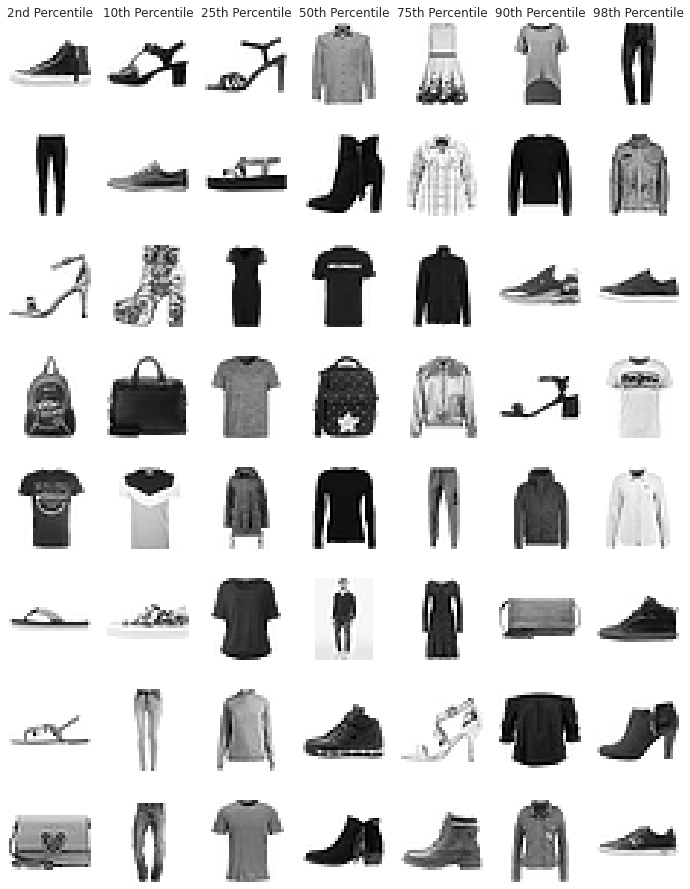

In [91]:
# Plotear cuartiles de 8 componentes
PCA_FM.plot_quartiles(PCA_FM.X_norm, PCA_FM.PCAModel, 8)

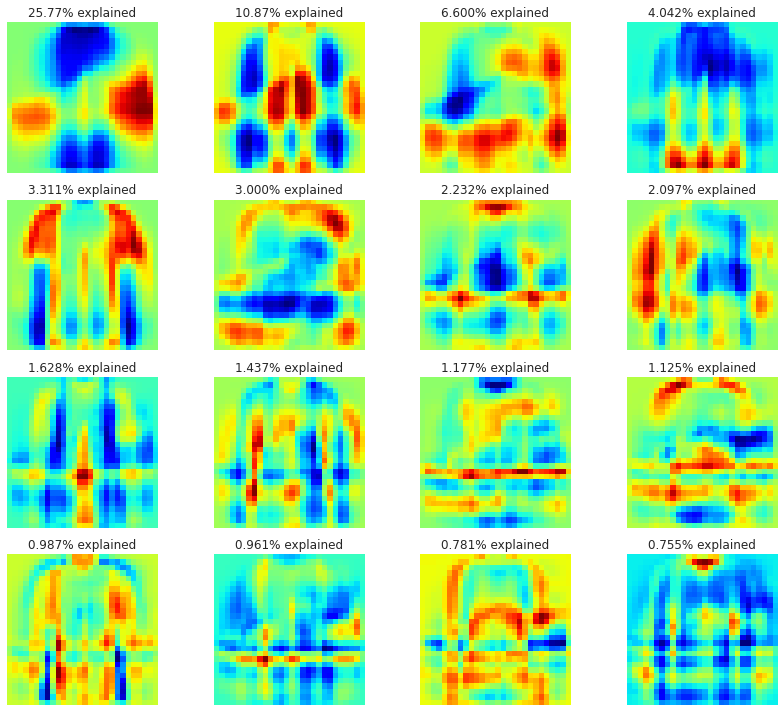

In [92]:
# Mostramos las direcciones principales de varianza
PCA_FM.ShowVarianceDirections(16)

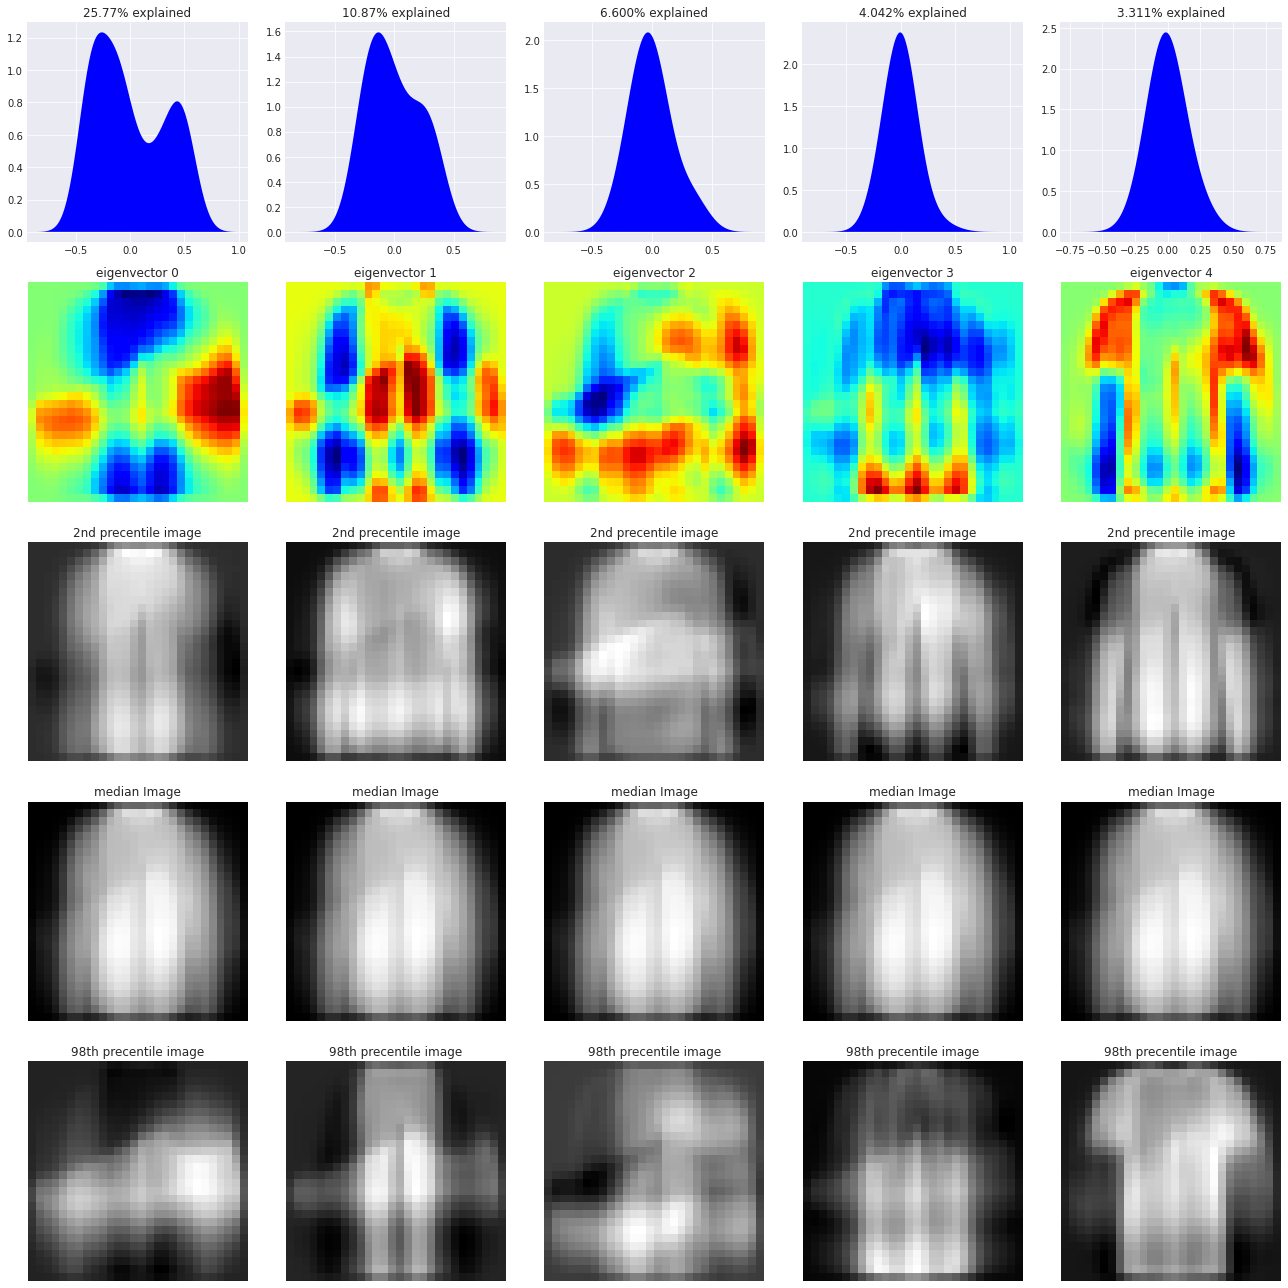

In [93]:
# En el siguiente gráfico vamos a mostrar los histogramas correspondientes a la distribución de cada una de las direcciones de
# mayor varianza (autovectores). Mostrar para cada componente, la mediana y algunos percentiles. Se vuelven a mostrar las
# direcciones de varianza

PCA_FM.ShowModelVariations()

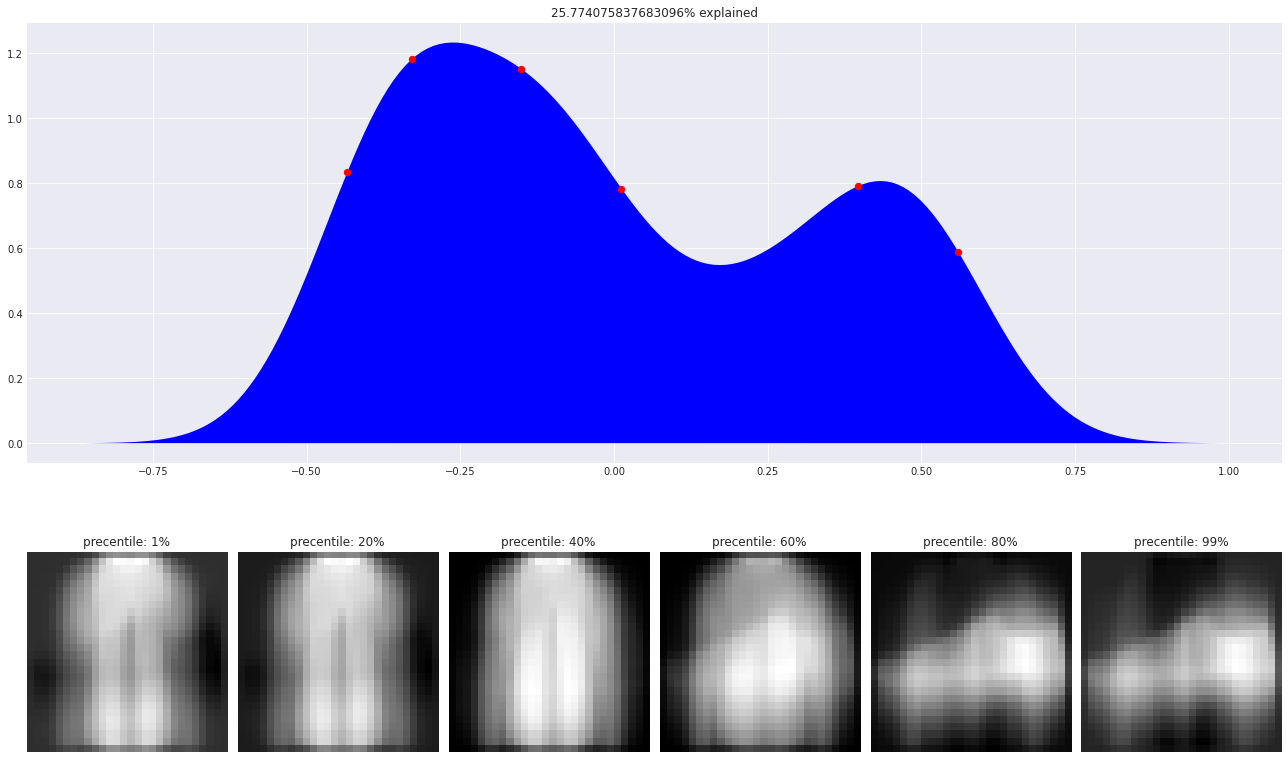

In [94]:
PCA_FM.ShowSingleComponentVariation(listOfComponents=[0])

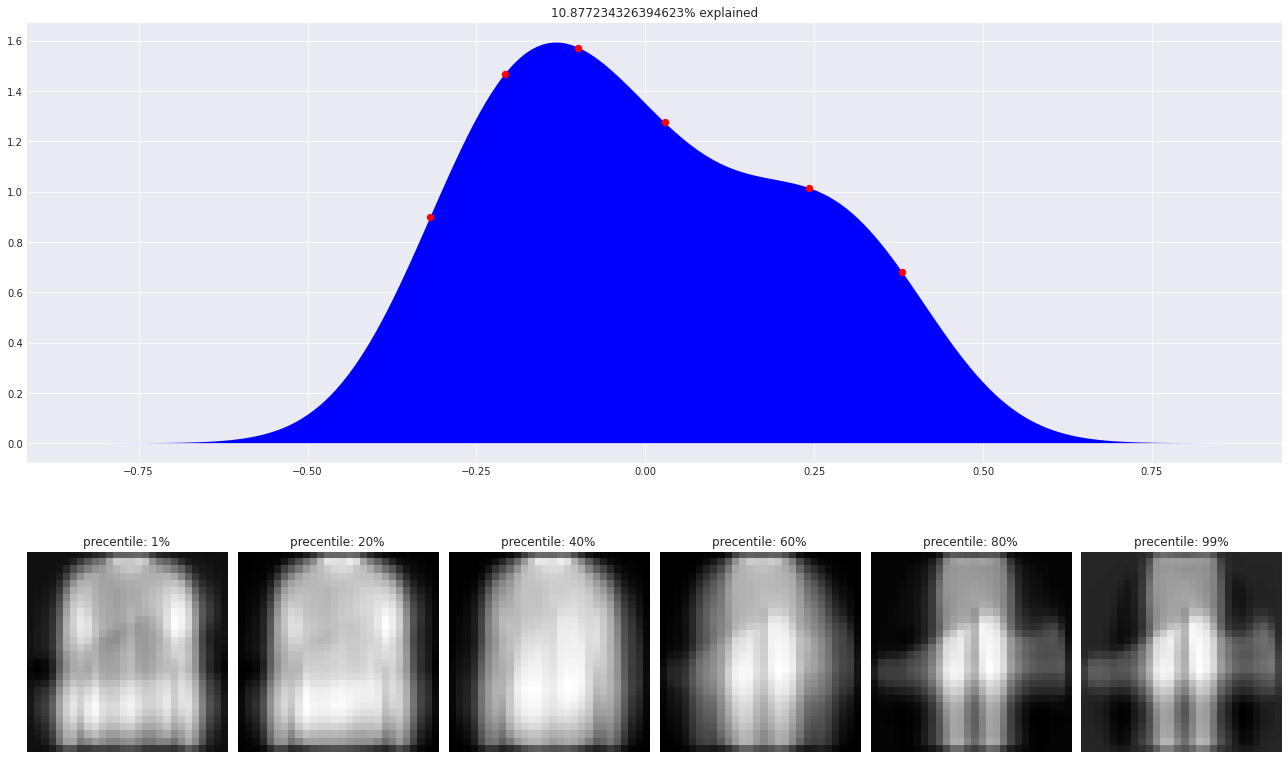

In [95]:
PCA_FM.ShowSingleComponentVariation(listOfComponents=[1])

In [96]:
y_mapping

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

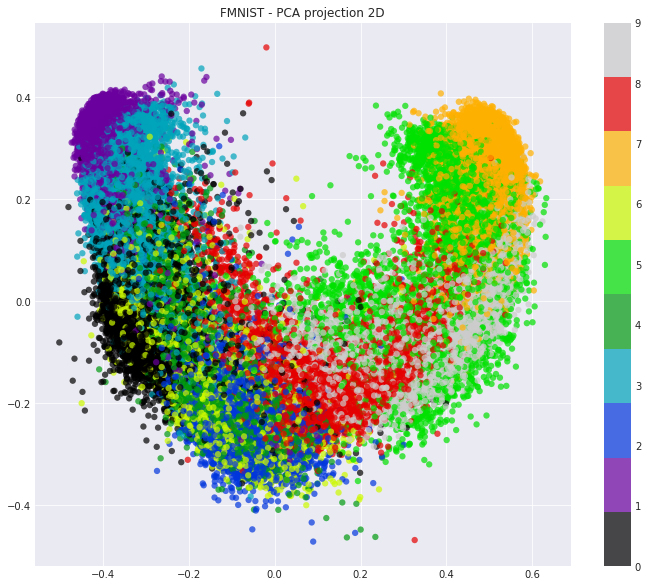

In [97]:
PCA_FM.plot_pca_space()